In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = r'C:\Windows\Fonts\malgun.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

## 선형 회귀

- y_hat = T(theta)*X
- 회귀의 성능 측정 지표 MSE : 오차 제곱의 평균

#### 정규방정식
비용 함수를 최소화하는 theta 값을 얻는 수학 공식을 정규방정식이라고 한다
- theta_hat = ( T(X)*X )^(-1) * T(X) * y

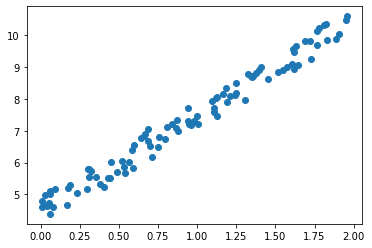

In [2]:
import numpy as np

X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.rand(100,1)
plt.scatter(X, y,)

In [3]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0=1 추가 #np.ones((100,1)) 는 1이 100개인 배열
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.52323873],
       [2.98895933]])

[[ 4.52323873]
 [10.5011574 ]]


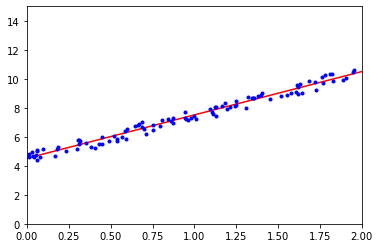

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
# 위와 같은 작업을 하는 사이킷런 코드
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print()
print(lin_reg.predict(X_new))

[4.52323873] [[2.98895933]]

[[ 4.52323873]
 [10.5011574 ]]


#### 계산 복잡도
특성 수를 n, 훈련 세트의 샘플 수를 m이라 하면
O(n^(2.4)) , O(m)

## 경사 하강법
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
- 파라미터 벡터 theta에 대해 비용 함수의 현재 그래디언트를 계산하고, 그래디언트가 감소하는 방향으로 진행된다. 그래디언트가 0이 되면 최솟값에 도달한 것이다
- theta를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수(예를 들면 MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다


- 경사하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정된다
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸리고, 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다(너무 통통 튐)


- 비용 함수는 그릇 모양을 하고 있지만, 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. 경사하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. 아니면 수렴하는 데 훨씬 오래 걸림

#### 배치 경사 하강법
- 각 모델 파라미터 theta(j)에 대해 비용 함수의 그래디언트 즉, theta(j)가 조금 변경될 때 미용함수가 얼마나 바뀌는지 계산해야 함(편도 함수)
- 파라미터 theta(j)에 대한 비용 함수의 편도함수 : (MSE를 theta에 대해 미분한 결과라고 생각하면 될 것 같다)
- 비용 함수의 그래디언트 벡터 = (2/m) * X_T * (X*theta - y)


- 위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 하므로 마이너스를 해줌, 
- theta(next step) = theta - (learning rate)*(비용함수의 그래디언트 벡터)

In [6]:
eta = 0.1 #학습률
n_iterations =1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.52323864],
       [2.98895941]])

적절한 학습률을 찾으려먼 그리드 탐색을 사용한다.

하지만 그리드 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다

반복 횟수를 아주 크게 지정하고, 그래디언트 벡터가 허용 오차보다 작아지면 알고리즘 중지

#### 확률적 경사 하강법
- 매 스텝에서 전체 훈련세트를 사용해 그래디언트를 계산하는 배치 경사 하강법과 달라, 확률적 경사 하강법은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산함
- 알고리즘이 훨씬 빠름
- 매우 큰 훈련 세트도 훈련시킬 수 있음


- 그러나 이는 배치 경사 하강법보다 훨씬 불안정
- 비용 함수가 매우 불규칙하면 지역 최솟값을 건너뛸 수도 있기 때문에, 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음


- 전역 최솟값에 다다르기 위해 학습률을 점진적으로 감소시키는 것이 좋음
- 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함
- 매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 함

In [7]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
theta

array([[4.51528229],
       [2.99047523]])

In [8]:
# 사이킷런에서 SGD 바익으로 선형회귀 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) #max_iter : 에포크, eta0 : 학습률
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.51251184]), array([3.00241493]))

#### 미니배치 경사 하강법
- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산
- 확률적 경사 하강법보다 좋은 점은, 행렬 연산에 최적화된 하드웨어, 즉 GPU를 사용해 얻는 성능 향상

## 다항 회귀
회귀식이 1차식이 아닌 2차식 이상일 때

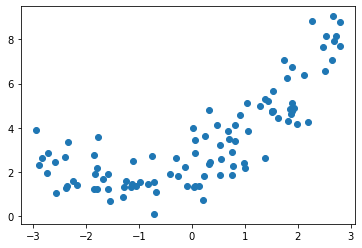

In [12]:
# 2차방정식
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "o")

In [14]:
#PolynomialFeatures 를 이용해 훈련데이터를 변환 (제곱 추가)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #degree :차수
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.06203655]
[0.06203655 0.00384853]


In [15]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.19647525]), array([[1.02045548, 0.41229666]]))

## 학습 곡선
차수가 높아질수록 과대적합, 낮아질수록 과소적합의 위험이 있다.

모델의 일반화 성능을 추정하는 방법 : 교차 검증, <b>학습 곡선 살펴보기</b>
    
학습 곡선
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다 (x축은 훈련 세트 크기, y축은 rmse)
- 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다

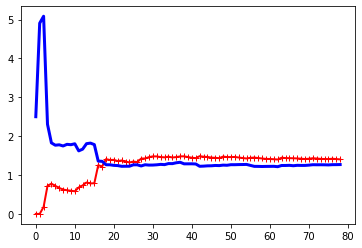

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors=[],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

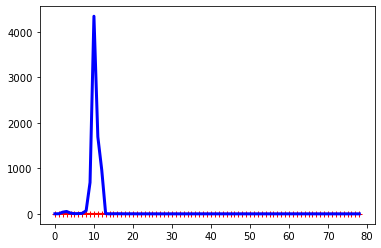

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## 규제가 있는 선형 모델
과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것 (다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것)

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 가중치 제한 방법으로는 릿지 회귀, 라쏘 회귀, 엘라스틱넷

#### 릿지 회귀
- 규제가 추가된 선형 회귀 버전
- 규제항 alpha*sigma(1~n, theta^2) 이 비용 함수에 추가된다.
- 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다
- 규제항은 훈련하는 동안에만 비용함수에 추가되고, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.


릿지 회귀의 비용 함수 = mse(theta) + alpha*(1/2)*sigma(1~n, theta^2)
- alpha=0 이면 릿지 회귀는 선형 회귀와 같아짐
- alpha가 아주 크면 거의 모든 가중치가 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨
- alpha를 증가시킬수록 모델의 분산은 줄지만 편향은 커짐 (분산/편향 트레이드오프)


릿지 회귀의 정규방정식
- theta_hat = (X_T * X + aA)^(-1) * X_T * y

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.80231909]])

In [25]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2") #penalty="l2" 는 릿지 회귀와 같은 규제항 추가
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([4.02358661])

#### 라쏘 회귀
- 선형 회귀의 또 다른 규제된 버전
- 라쏘 회귀의 비용 함수 = mse(theta) + alpha*sigma(1~n, 절댓값(theta))
- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점 (즉, 가중치가 0이 됨)
- 즉, 라쏘 회귀는 자동으로 특성 선택을 하고 희소모델을 만든다
- 라쏘의 비용 함수는 theta(i)=0 에서 미분가능하지 않지만, 이 때 서브그래디언트 벡터를 사용하면 경사하강법 적용에 문제 없음

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.75634116])

In [27]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1") #penalty="l1" 는 라쏘 회귀와 같은 규제항 추가
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([4.08514569])

#### 엘라스틱넷
- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용, 혼합 정도는 혼합비율 r을 사용해 조절 (0이면 릿지 회귀, 1이면 라쏘 회귀와 같음)
- 비용 함수 : mse(theta) + r * alpha * sigma(1 ~ n, theta절댓값) + ((1-r)/2) * alpha * sigma(1 ~ n, theta^2)

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1_ratio 가 혼합비율 r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.75750424])

규제 없는 선형 회귀, 릿지, 라쏘, 엘라스틱넷을 선택하는 기준은?
- 규제가 약간 있는 것이 대부분 좋으므로 평범한 선형 회귀는 피해야 함
- 릿지가 기본이 되지만, 실제로 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음 (이들은 불필요한 특성의 가중치를 0으로 만들어주므로)
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때에는 라쏘보단 엘라스틱넷

#### 조기 종료
- 경사하강법 같은 반복적 학습 알고리즘 규제하는 방식은 검증 에러가 최솟값에 도달하면 바로 훈련 중지시키는 것 (조기 종료)

In [32]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)


        
        
        
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, 
                       learning_rate="constant", eta0=0.0005, random_state=42)
#warm_start=True 는 fit() 메서드가 호출될때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련 이어감
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of i

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of i

C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of i

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of i

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

In [33]:
best_epoch, best_model

(3,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))

## 로지스틱 회귀

#### 확률 추정
- 결과값은 로지스틱 (0~1 사이의 값을 출력하는 시그모이드 함수)
- 로지스틱 함수 sigma(t) = 1 / (1+exp(-t))

#### 훈련과 비용 함수
- 로지스틱 회귀의 비용 함수 = (-1/m) * sigma{ (y_i * log( p_hat_i )) + ( (1-y_i)*log(1-p_hat_i) }
- 이 비용 함수의 최솟값을 계산하는 알려진 해가 없지만, 이 비용 함수는 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾느 것을 보장한다.

#### 결정 경계

In [34]:
# Iris-Versicolor 종을 감지하는 분류기 만들기

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [35]:
X = iris["data"][:, 3:]
y = (iris["target"]==2).astype(np.int) #Iris-Versicolor이면 1, 아니면 0

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

LogisticRegression(solver='liblinear')

[[0.98554411 0.01445589]
 [0.98543168 0.01456832]
 [0.98531838 0.01468162]
 ...
 [0.02618938 0.97381062]
 [0.02598963 0.97401037]
 [0.02579136 0.97420864]]


C:\ai\programs\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


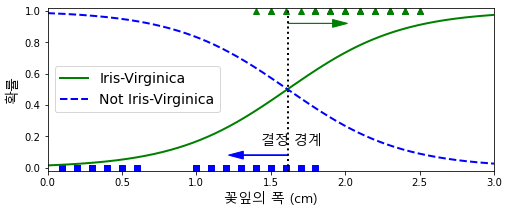

In [46]:
# 꽃잎의 너비가 0~3인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1) # 0부터 3까지 1000개의 요소 만들고, 2d로 변환
y_proba = log_reg.predict_proba(X_new)
print(y_proba)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center",fontproperties=fontprop)
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14, fontproperties=fontprop)
plt.ylabel("확률", fontsize=14,fontproperties=fontprop)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [47]:
#결정 경계 확인 1.5~1.7 사이에 결정 경계가 있다
log_reg.predict([[1.7], [1.5]])

array([1, 0])

다른 선형 모델처럼 로지스틱 회귀 모델도 l1, l2 페널티를 사용해 규제할 수 있다.

#### 소프트맥스 회귀
- 소프트맥스 회귀 (다항 로지스틱 회귀) : 다중 클래스 지원
- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다
- 각 클래스는 자신만의 파라미터 벡터가 있는데, 이 벡터들은 파라미터 행렬에 행으로 저장된다.
- 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 p_hat_k 를 추정할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화한다.

- 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다


- 각 클래스에 대한 크로스 엔트로피의 그래디언트 벡터를 계산할 수 있고, 이를 통해 비용 함수를 최소화하기 위한 파라미터 행렬을 찾기 위해 경사 하강법을 사용할 수 있다.

In [48]:
# 소프트맥스 회귀 사용해 붓꽃을 세개의 클래스로 분류
# 사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다 전략 사용하지만, 
# multi_class="multinomial"로 바꾸면 소프트맥스 회귀 사용 가능
# 소프트맥스 회귀 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘 지정해야 한다

X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,2]]), softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


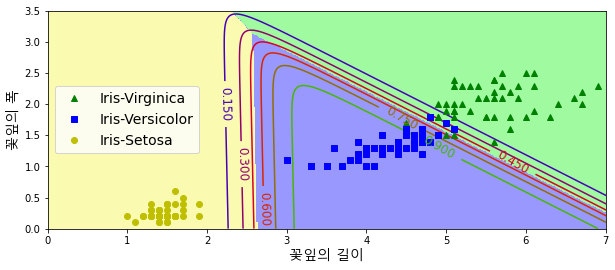

In [49]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()] #ravel 는 1차원 변환


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14,fontproperties=fontprop)
plt.ylabel("꽃잎의 폭", fontsize=14,fontproperties=fontprop)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()